In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from seaborn import kdeplot
import os

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [68]:
with zipfile.ZipFile('C:/data/brasil/IBGE/PNAD/Dicionario_e_input_20221031.zip') as z:
    dicionario = pd.read_excel(z.open(z.namelist()[0]), header=None, 
                              skiprows=4, dtype='string').dropna(how='all')[[0, 1, 2, 4, 5, 6]]


dicionario[2].fillna(value=None, method='ffill', inplace=True)
dicionario.set_index(2, inplace=True)
dicionario.index = dicionario.index.str.lower()

In [69]:
#tamanhos de colunas para abrir o fwf
dropAlpha = dicionario[0][
    dicionario[0].str.isnumeric()==False
        ].index

positionFrom = dicionario[0].drop(dropAlpha).dropna().astype(int)
positionTo = (
    dicionario[0].drop(dropAlpha).dropna().astype(int)
    +
    dicionario[1].drop(dropAlpha).dropna().astype(int)
)

colspecs = [x for x in zip(positionFrom-1, (positionTo-1))]
names = dicionario[dicionario.columns[:-3]].dropna().index

In [70]:
names

Index(['ano', 'trimestre', 'uf', 'capital', 'rm_ride', 'upa', 'estrato',
       'v1008', 'v1014', 'v1016',
       ...
       'v1028191', 'v1028192', 'v1028193', 'v1028194', 'v1028195', 'v1028196',
       'v1028197', 'v1028198', 'v1028199', 'v1028200'],
      dtype='string', name=2, length=420)

In [62]:
with zipfile.ZipFile('C:/data/brasil/IBGE/PNAD/PNADC_012024.zip') as z:
    pnad = pd.read_fwf(z.open(z.namelist()[0]), colspecs=colspecs, names=names,
                      skiprows=0, skipfooter=0, dtype=object)

In [63]:
pnad[pnad.columns[10:30]].head()

,v1022,v1023,v1027,v1028,v1029,v1033,posest,posest_sxi,v2001,v2003,v2005,v2007,v2008,v20081,v20082,v2009,v2010,v3001,v3002,v3002a
0,1,1,000129.24953021,000138.19197295,000572247,004548207,111,214,01,01,01,2,02,10,1954,069,4,1,2,NaN
1,1,1,000129.24953021,000233.79085641,000572247,008421419,111,108,02,01,01,1,09,07,1987,036,4,1,2,NaN
2,1,1,000129.24953021,000233.79085641,000572247,008653747,111,208,02,02,02,2,09,05,1984,039,4,1,2,NaN
3,1,1,000129.24953021,000264.21720732,000572247,008421419,111,108,02,01,01,1,10,06,1988,035,4,1,2,NaN
4,1,1,000129.24953021,000264.21720732,000572247,008528734,111,206,02,02,02,2,09,06,1995,028,4,1,2,NaN


In [64]:
def cat_dict(df, var): #substituir códigos pelo nome da categoria
    catDict = dict()
    for n, cat in enumerate(dicionario.loc[var][5]):
        try:
            catDict[cat] = dicionario.loc[var][6][n].lower()
        except:
            pass
    return catDict

In [71]:
cat_dict(dicionario, 'v3002')

{'1': 'sim', '2': 'não ', <NA>: 'não aplicável'}

In [72]:
 def drop_min_obs(df, min_obs=10000): #excluir colunas que não tenha o min desejado de obs
    to_drop = list()
    for i in df.columns:
        n_obs = (df[i].isna()==False).sum()
        if n_obs<min_obs:
            to_drop.append(i)
        else:
            pass

    return df.drop(to_drop, axis=1, inplace=True)

In [73]:
pnad.columns = pnad.columns.str.lower()

In [74]:
pnad.head()

,ano,trimestre,uf,capital,rm_ride,upa,estrato,v1008,v1014,v1016,...,v1028191,v1028192,v1028193,v1028194,v1028195,v1028196,v1028197,v1028198,v1028199,v1028200
0,2024,1,11,11,NaN,110000016,1110011,03,11,1,...,000000.00000000,000262.16711585,000000.00000000,000000.00000000,000143.67403675,000273.50679220,000293.93172045,000132.63878515,000135.74098964,000122.05553753
1,2024,1,11,11,NaN,110000016,1110011,06,11,1,...,000000.00000000,000462.00723697,000000.00000000,000000.00000000,000232.64947183,000465.94012835,000498.14442921,000216.01457313,000227.08555320,000206.84417124
2,2024,1,11,11,NaN,110000016,1110011,06,11,1,...,000000.00000000,000462.00723697,000000.00000000,000000.00000000,000232.64947183,000465.94012835,000498.14442921,000216.01457313,000227.08555320,000206.84417124
3,2024,1,11,11,NaN,110000016,1110011,08,11,1,...,000000.00000000,000541.73892365,000000.00000000,000000.00000000,000270.35412705,000530.36055722,000580.92059084,000248.89186139,000256.50577688,000237.95009732
4,2024,1,11,11,NaN,110000016,1110011,08,11,1,...,000000.00000000,000541.73892365,000000.00000000,000000.00000000,000270.35412705,000530.36055722,000580.92059084,000248.89186139,000256.50577688,000237.95009732


In [75]:
variaveis = ['upa','estrato','v1008', 'v2007', 'v2009', 'v2010', 'v403312','vd3005']

def moradoresMesmoDomicilio(df, variaveis):
    respFilhos = df[df['v2005']=='01'][variaveis]\
                            .merge(df[(df['v2005']=='04')|(df['v2005']=='05')][variaveis],
                                       on=['upa', 'estrato', 'v1008'], how='inner', suffixes=['_r','_f'])


    filtro = (respFilhos['v2009_f'].astype(int)>25)
    respFilhos = respFilhos[filtro]
    respFilhos['vd3005_f'] = respFilhos['vd3005_f'].astype(int)

    respFilhos['domicilio'] = respFilhos['upa'] + respFilhos['estrato'] + respFilhos['v1008']
    respFilhos.drop(['upa', 'estrato', 'v1008'], axis=1, inplace=True)
    respFilhos['vd3005_r'] = respFilhos['vd3005_r'].astype(int)
    return respFilhos

In [76]:
respFilhos = moradoresMesmoDomicilio(pnad, variaveis)

In [77]:
def discretize(df, steps=4):
    labels = [str(x)+'a'+str(x+steps) if n==0 else str(x)+'a'+str(x+steps) if n == 0 else str(x+1)+'a'+str(x+steps)
                          for n, x in enumerate(np.unique(
                                               np.linspace(0, df['vd3005_r'].astype(int).max(), steps, endpoint=False)
                                                       ).astype(int)
                                                          )]
    df['vd3005_r_c'] = pd.cut(df['vd3005_r'].astype(int), bins=steps, labels=labels)
    return df

In [78]:
respFilhos = respFilhos.groupby(['domicilio']).mean().pipe(discretize, 4)
anosEstudados = respFilhos.groupby(['vd3005_r_c']).mean()

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_16516\894495251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  respFilhos = respFilhos.groupby(['domicilio']).mean().pipe(discretize, 4)


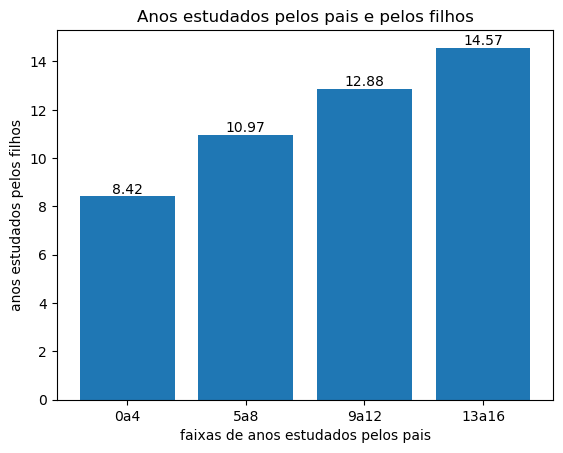

In [79]:
plt.title('Anos estudados pelos pais e pelos filhos')
plt.bar_label(
plt.bar(anosEstudados.index, anosEstudados['vd3005_f'].values.round(2)))
plt.ylabel('anos estudados pelos filhos'), plt.xlabel('faixas de anos estudados pelos pais')
plt.show()

• Com este gráfico, é possível ver a associação entre quantidade de anos estudados pelos filhos e pelos responsáveis
com diferença da média de anos estudados pelos filhos de 2,6 anos se comparado os responsáveis na faixa de 5 a 8 anos de estudos com os dos filhos de responsáveis na faixa de 0 a 4 anos de estudo. A diferença de média de anos estudados para as faixas de estudo seguintes (9 a 12 anos - 5 a 8 anos e 13 a 16 anos - 12 a 9 anos) dos responsáveis é de 1,9 anos.

In [80]:
respFilhos = moradoresMesmoDomicilio(pnad, variaveis).pipe(discretize, 4)

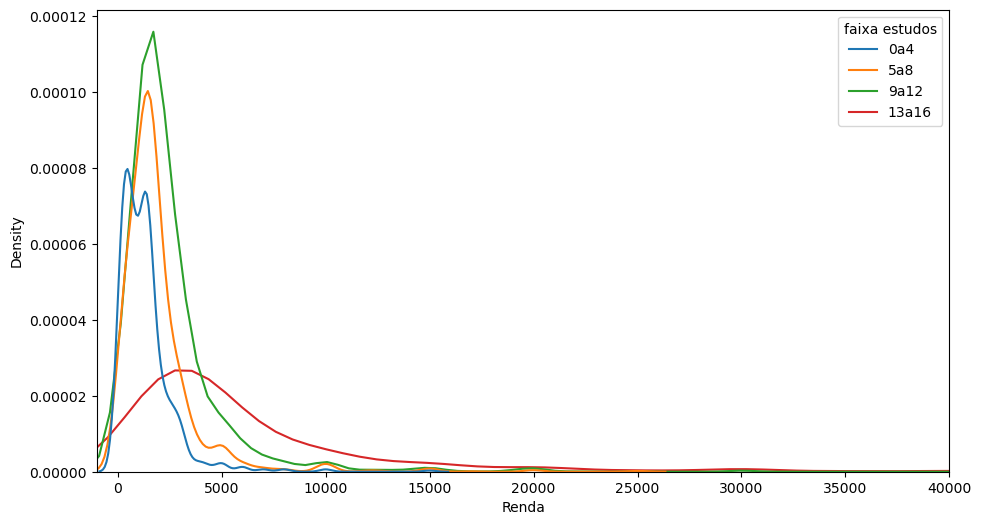

(Text(0.5, 24.0, 'Renda'), (-1000.0, 40000.0), None)

In [81]:
plt.figure(figsize=(11,6))
kdeplot(data=respFilhos.rename({'vd3005_r_c':'faixa estudos'},axis=1), 
        x=respFilhos['v403312_r'].dropna().astype(int), hue='faixa estudos')
plt.xlabel('Renda'), plt.xlim([-1000, 40000]), plt.show()

### Exclusão escolar

In [82]:
variaveis = ['upa','estrato','v1008', 'v2007', 'v2009', 'v2010', 'v403312','vd3005'] + \
            ['v4001', 'v4002', 'vd3004', 'v3002', 'v3002a']
idadeEscolar = pnad[
                        ((pnad['v2009'].astype(int)>3)&(pnad['v2009'].astype(int)<18))&
                        ((pnad['v2005']=='04')|(pnad['v2005']=='05'))&
                        (pnad['vd3004'].dropna().astype(int)<5)&
                        (pnad['v2010']!='9')
                                                                        ][variaveis]
idadeEscolar.reset_index(drop=True, inplace=True)

In [83]:
idadeEscolar['v2010'] = ['outros' if x=='3' or x=='5' else x for x in idadeEscolar['v2010']]
idadeEscolar['trabalha'] = ['1' if (x[0]=='1' or x[1]=='1') else '2' if (x[0]=='2' or x[1]=='2') else np.nan 
                                                 for x in zip(idadeEscolar['v4001'], idadeEscolar['v4002'])]
idadeEscolar.drop(['v4001', 'v4002'], axis=1, inplace=True)

In [84]:
idadeEscolar[idadeEscolar['v3002']=='2'].shape[0] / idadeEscolar.shape[0]

0.019084247483355913

In [85]:
tabelaContingencia = pd.crosstab(idadeEscolar[idadeEscolar['v2009'].astype(int)>13]['v3002'].rename('estuda'), 
            [idadeEscolar[idadeEscolar['v2009'].astype(int)>13]['trabalha'].rename(cat_dict(idadeEscolar, 'v3002')),
             idadeEscolar[idadeEscolar['v2009'].astype(int)>13]['v2007'].rename('sexo'),
             idadeEscolar[idadeEscolar['v2009'].astype(int)>13]['v2010'].rename('cor/raça')], normalize='index')\
                                                                .rename(cat_dict(idadeEscolar, 'v2007'), axis=1, level=1)\
                                                                .rename(cat_dict(idadeEscolar, 'v4001'), axis=1, level=0)\
                                                                .rename(cat_dict(idadeEscolar, 'v2010'), axis=1, level=2)\
                                                                .rename(cat_dict(idadeEscolar, 'v4001'))

In [86]:
tabelaContingencia = tabelaContingencia.transpose().sort_index()

In [90]:
(tabelaContingencia*100).round(2)

estuda                      sim   não 
trabalha sexo   cor/raça              
não      homem  branca    15.72  11.49
                outros     0.53   0.26
                parda     27.40  32.51
                preta      3.89   4.05
         mulher branca    16.23   7.05
                outros     0.48   0.78
                parda     25.20  19.84
                preta      3.72   3.00
sim      homem  branca     1.53   4.83
                outros     0.02   0.13
                parda      2.31  11.10
                preta      0.35   1.17
         mulher branca     1.15   1.44
                outros     0.03   0.00
                parda      1.27   1.83
                preta      0.18   0.52

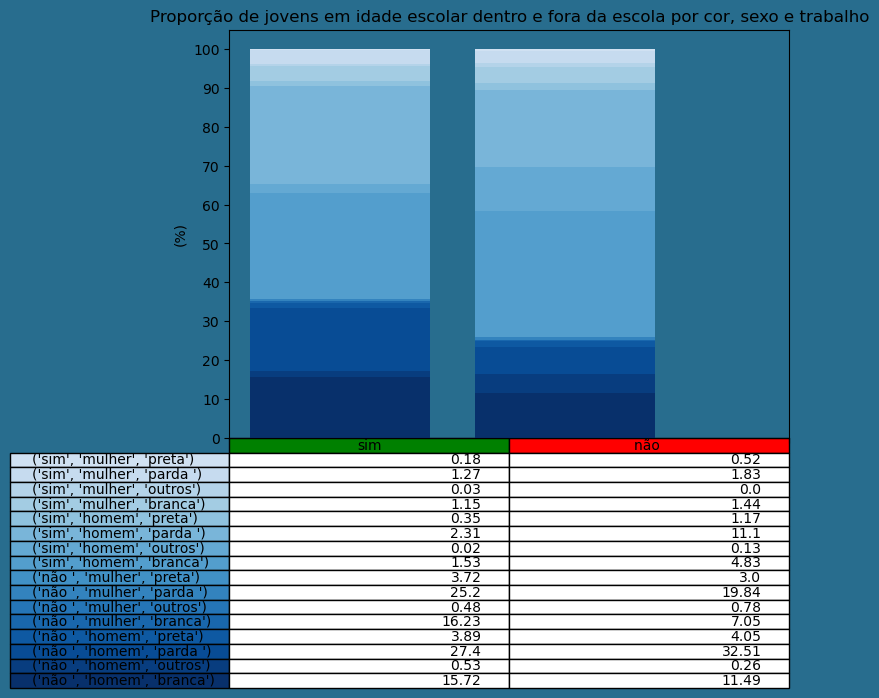

In [87]:
plt.figure(figsize=(8,6), facecolor='#286d8e'), plt.rcParams.update({'axes.facecolor':'#286d8e'})

colorsList = plt.cm.Blues(np.flip(np.linspace(0.2, 1, tabelaContingencia.shape[0])))
for col in tabelaContingencia.columns:
    y_offset = 0
    color = 0
    for index2 in tabelaContingencia.index.get_level_values(2).unique():
        for index1 in tabelaContingencia.index.get_level_values(1).unique():
            for index0 in tabelaContingencia.index.get_level_values(0).unique():
                y = tabelaContingencia.loc[index0, col][index1][index2]*100
                plt.bar(col, y, bottom=y_offset, color=colorsList[color])
                y_offset+=y
                color+=1

plt.xticks(['']), plt.yticks(np.arange(0,101,10)), plt.ylim([0,105]), plt.ylabel('(%)')
plt.title('Proporção de jovens em idade escolar dentro e fora da escola por cor, sexo e trabalho')
plt.table(cellText=(tabelaContingencia.values*100).round(2)[-1::-1],
          rowLabels=tabelaContingencia.index[-1::-1],
          rowColours=colorsList[-1::-1],
          colLabels=tabelaContingencia.columns,
          colColours=['green', 'red'])
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()